In [1]:
import numpy as np          
import pandas as pd         
import matplotlib.pyplot as plt   
import seaborn as sbn   
sbn.set_style('whitegrid')
%matplotlib inline    


from sklearn.model_selection import train_test_split    
from sklearn.preprocessing import MinMaxScaler          


import tensorflow as tf                                
from tensorflow.keras.models import Sequential         
from tensorflow.keras.layers import Dense              
#

# Metric Libraris

from sklearn.metrics import mean_absolute_error         # MAE 
from sklearn.metrics import mean_squared_error          # MSE 
                                                        # RMSE
from sklearn.metrics import mean_squared_log_error      # RMSLE
from sklearn.metrics import r2_score                    # R²  
from sklearn.metrics import mean_poisson_deviance       # MAPE
from sklearn import metrics

from tensorflow.keras.models import load_model                


from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping          




In [2]:
dataFrameVerisi1 =pd.read_csv("Çalışmalar/datasets/1.Seans.csv")
dataFrameVerisi2 =pd.read_csv("Çalışmalar/datasets/2.Seans.csv")
dataFrameVerisi3 =pd.read_csv("Çalışmalar/datasets/3.Seans.csv")
dataFrameVerisi4 =pd.read_csv("Çalışmalar/datasets/4.Seans.csv")

In [3]:
dataFrameVerisi1

,period,demand,marketPrice,oldMarketPrace,quant,player_bid_price,pltNum,Bioenergy,CCGT,Coal,...,to_build_period,operation_period,fc_Urn,fc_Coal,fc_Gas,fc_Bio,cc_Urn,cc_Coal,cc_Gas,cc_Bio
0,1,26640,155,0,680,120,16,0,1,0,...,2.0,7.0,1.00,4.00,9.00,3.00,0,2.000,2.0000,0.5000
1,1,26640,155,0,180,132,18,0,1,0,...,2.0,7.0,1.00,4.00,9.00,3.00,0,2.000,2.0000,0.5000
2,1,26640,155,0,300,121,18,0,1,0,...,2.0,7.0,1.00,4.00,9.00,3.00,0,2.000,2.0000,0.5000
3,1,26640,155,0,200,143,18,0,1,0,...,2.0,7.0,1.00,4.00,9.00,3.00,0,2.000,2.0000,0.5000
4,1,26640,155,0,500,90,24,0,1,0,...,2.0,7.0,1.00,4.00,9.00,3.00,0,2.000,2.0000,0.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3972,32,246444,200,200,180,70,559,0,0,0,...,2.0,7.0,3.12,15.32,99.99,5.22,0,7.646,9.9999,0.8724
3973,32,246444,200,200,50,50,473,0,0,0,...,NaN,NaN,3.12,15.32,99.99,5.22,0,7.646,9.9999,0.8724
3974,32,246444,200,200,48,90,498,0,0,0,...,NaN,NaN,3.12,15.32,99.99,5.22,0,7.646,9.9999,0.8724
3975,32,246444,200,200,240,150,500,0,0,0,...,NaN,NaN,3.12,15.32,99.99,5.22,0,7.646,9.9999,0.8724


In [4]:
dataFrameVerisi1.describe().to_excel("Describe/1.seans_describe.xlsx")  
dataFrameVerisi2.describe().to_excel("Describe/2.seans_describe.xlsx")
dataFrameVerisi3.describe().to_excel("Describe/3.seans_describe.xlsx")
dataFrameVerisi4.describe().to_excel("Describe/4.seans_describe.xlsx")
# dataFrameVerisi1.describe()
# dataFrameVerisi2.describe()
# dataFrameVerisi3.describe()
# dataFrameVerisi4.describe()

<Figure size 1440x1080 with 0 Axes>

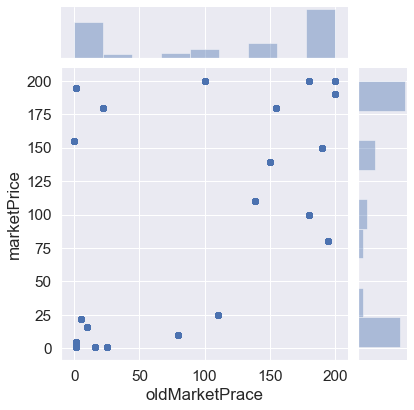

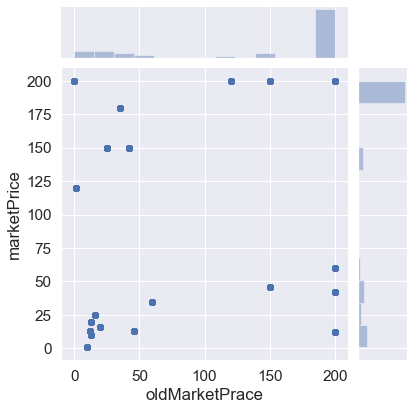

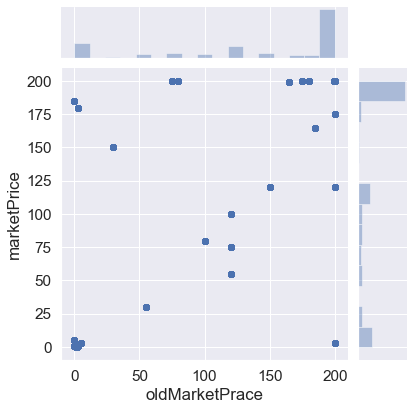

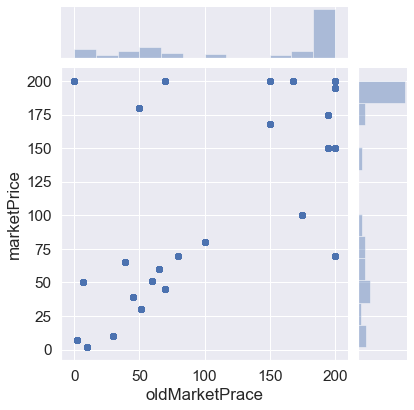

In [5]:
plt.figure(figsize = (20,15))
sbn.set(font_scale = 1.4)
fig1 = sbn.jointplot(data = dataFrameVerisi1, x= 'oldMarketPrace', y= 'marketPrice' ).savefig("[png]_jointplot/1.seans_jointplot_oldMarketPrace-marketPrice.png",dpi =300)
fig2 = sbn.jointplot(data = dataFrameVerisi2, x= 'oldMarketPrace', y= 'marketPrice' ).savefig("[png]_jointplot/2.seans_jointplot_oldMarketPrace-marketPrice.png",dpi =300)
fig3 = sbn.jointplot(data = dataFrameVerisi3, x= 'oldMarketPrace', y= 'marketPrice' ).savefig("[png]_jointplot/3.seans_jointplot_oldMarketPrace-marketPrice.png",dpi =300)
fig4 = sbn.jointplot(data = dataFrameVerisi4, x= 'oldMarketPrace', y= 'marketPrice' ).savefig("[png]_jointplot/4.seans_jointplot_oldMarketPrace-marketPrice.png",dpi =300)


In [6]:
dataFrameVerisi1.corr().to_excel("Correlation/1.seans_correlation.xlsx")
dataFrameVerisi2.corr().to_excel("Correlation/2.seans_correlation.xlsx")
dataFrameVerisi3.corr().to_excel("Correlation/3.seans_correlation.xlsx")
dataFrameVerisi4.corr().to_excel("Correlation/4.seans_correlation.xlsx")
dataFrameVerisi1Corr = dataFrameVerisi1.corr()
dataFrameVerisi2Corr = dataFrameVerisi2.corr()
dataFrameVerisi3Corr = dataFrameVerisi3.corr()
dataFrameVerisi4Corr = dataFrameVerisi4.corr()
dataFrameVerisi3Corr

,period,demand,marketPrice,oldMarketPrace,quant,player_bid_price,pltNum,Bioenergy,CCGT,Coal,...,to_build_period,operation_period,fc_Urn,fc_Coal,fc_Gas,fc_Bio,cc_Urn,cc_Coal,cc_Gas,cc_Bio
period,1.000000,0.950946,0.109578,0.188969,0.123874,0.267321,0.871037,0.065608,0.100103,0.085602,...,0.121429,0.134810,0.928884,0.865900,0.831533,0.944119,NaN,0.866486,0.808961,0.943982
demand,0.950946,1.000000,-0.012559,0.063517,0.141209,0.186891,0.885581,0.066691,0.048292,0.074963,...,0.154375,0.155113,0.991614,0.966358,0.652397,0.946640,NaN,0.966650,0.932905,0.945415
marketPrice,0.109578,-0.012559,1.000000,0.668311,-0.106492,0.378191,-0.011923,-0.046001,0.073356,0.012205,...,-0.057776,0.029080,-0.053067,-0.172848,0.246308,-0.083778,NaN,-0.172259,-0.216173,-0.083239
oldMarketPrace,0.188969,0.063517,0.668311,1.000000,-0.077189,0.443479,0.071635,-0.025985,0.061557,0.025713,...,-0.086133,0.013731,-0.001165,-0.110976,0.229699,-0.055771,NaN,-0.110060,-0.170423,-0.055822
quant,0.123874,0.141209,-0.106492,-0.077189,1.000000,-0.079503,0.162449,-0.008731,0.175328,0.027821,...,-0.016245,-0.066549,0.143150,0.153638,0.080400,0.147909,NaN,0.153647,0.151360,0.147664
player_bid_price,0.267321,0.186891,0.378191,0.443479,-0.079503,1.000000,0.183033,-0.021474,0.102732,-0.006655,...,0.004213,0.061679,0.149790,0.077044,0.289229,0.138653,NaN,0.077771,0.028716,0.138490
pltNum,0.871037,0.885581,-0.011923,0.071635,0.162449,0.183033,1.000000,0.114341,0.138352,0.042307,...,-0.020071,-0.051298,0.880803,0.853251,0.649558,0.867041,NaN,0.853533,0.818918,0.866519
Bioenergy,0.065608,0.066691,-0.046001,-0.025985,-0.008731,-0.021474,0.114341,1.000000,-0.030443,-0.018709,...,-0.067772,-0.179200,0.074718,0.080831,0.046008,0.078426,NaN,0.080852,0.074057,0.078612
CCGT,0.100103,0.048292,0.073356,0.061557,0.175328,0.102732,0.138352,-0.030443,1.000000,-0.089166,...,-0.337147,-0.511200,0.042857,0.013068,0.161799,0.071304,NaN,0.013134,0.003593,0.072158
Coal,0.085602,0.074963,0.012205,0.025713,0.027821,-0.006655,0.042307,-0.018709,-0.089166,1.000000,...,0.260067,0.148959,0.072492,0.064695,0.080783,0.074871,NaN,0.064702,0.059541,0.075064


In [7]:
# marketPrice özelinde kolerasyon
# marketPrice üzerinde etkisi olmayanlar dataframe den silinmiştir.
dataFrameVerisi1.drop(["quant","pltNum","player_bid_price","cc_Urn"],axis=1).to_excel("Mpcorr/1.seans_mpcorr.xlsx")
dataFrameVerisi2.drop(["quant","pltNum","player_bid_price","cc_Urn"],axis=1).to_excel("Mpcorr/2.seans_mpcorr.xlsx")
dataFrameVerisi3.drop(["quant","pltNum","player_bid_price","cc_Urn"],axis=1).to_excel("Mpcorr/3.seans_mpcorr.xlsx")
dataFrameVerisi4.drop(["quant","pltNum","player_bid_price","cc_Urn"],axis=1).to_excel("Mpcorr/4.seans_mpcorr.xlsx")
mPCorr1 = dataFrameVerisi1.drop(["quant","pltNum","player_bid_price","cc_Urn"],axis=1)
mPCorr2 = dataFrameVerisi2.drop(["quant","pltNum","player_bid_price","cc_Urn"],axis=1)
mPCorr3 = dataFrameVerisi3.drop(["quant","pltNum","player_bid_price","cc_Urn"],axis=1)
mPCorr4 = dataFrameVerisi4.drop(["quant","pltNum","player_bid_price","cc_Urn"],axis=1)


In [8]:
mPCorr11= dataFrameVerisi1.drop(["quant","pltNum","player_bid_price","cc_Urn"],axis=1).corr()["marketPrice"].sort_values()
mPCorr22 = dataFrameVerisi2.drop(["quant","pltNum","player_bid_price","cc_Urn"],axis=1).corr()["marketPrice"].sort_values()
mPCorr33 = dataFrameVerisi3.drop(["quant","pltNum","player_bid_price","cc_Urn"],axis=1).corr()["marketPrice"].sort_values()
mPCorr44 = dataFrameVerisi4.drop(["quant","pltNum","player_bid_price","cc_Urn"],axis=1).corr()["marketPrice"].sort_values()
mPCorr = pd.concat([mPCorr11,mPCorr22,mPCorr33,mPCorr44] , axis = 1 )
mPCorr.columns = ['1.Seans marketPrice','2.Seans marketPrice','3.Seans marketPrice','4.Seans marketPrice']
mPCorr.to_excel("Mpcorr[marketPrice]/mpcorr.xlsx")
# mPCorr

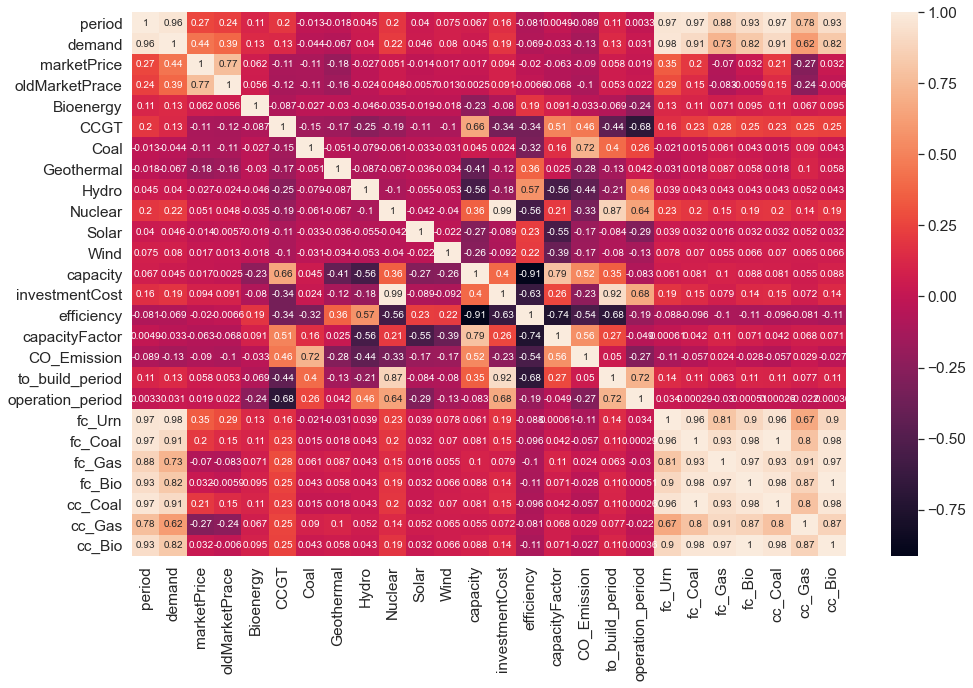

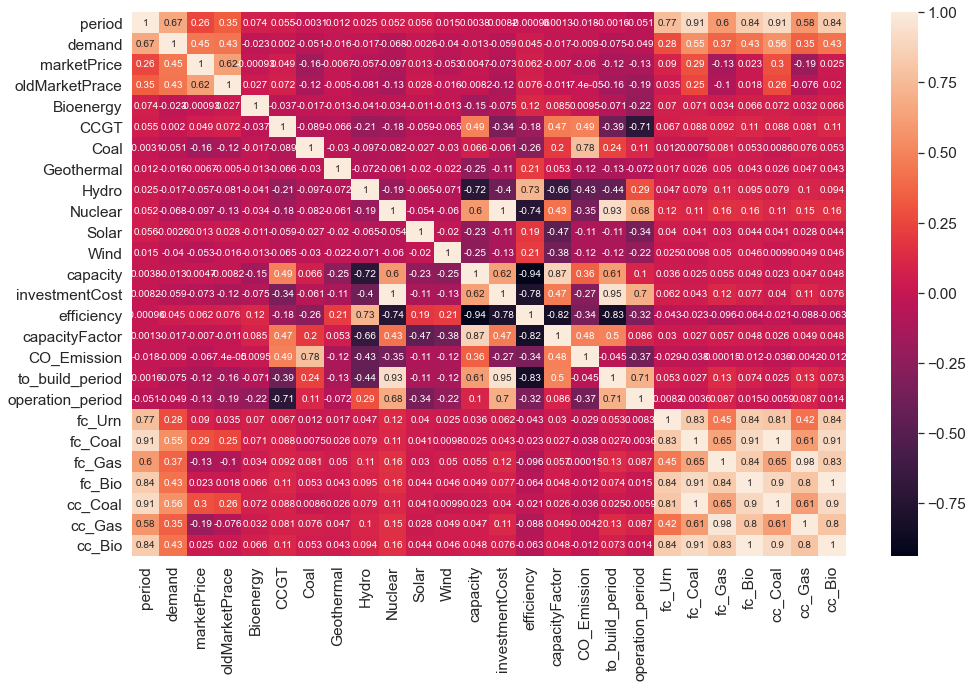

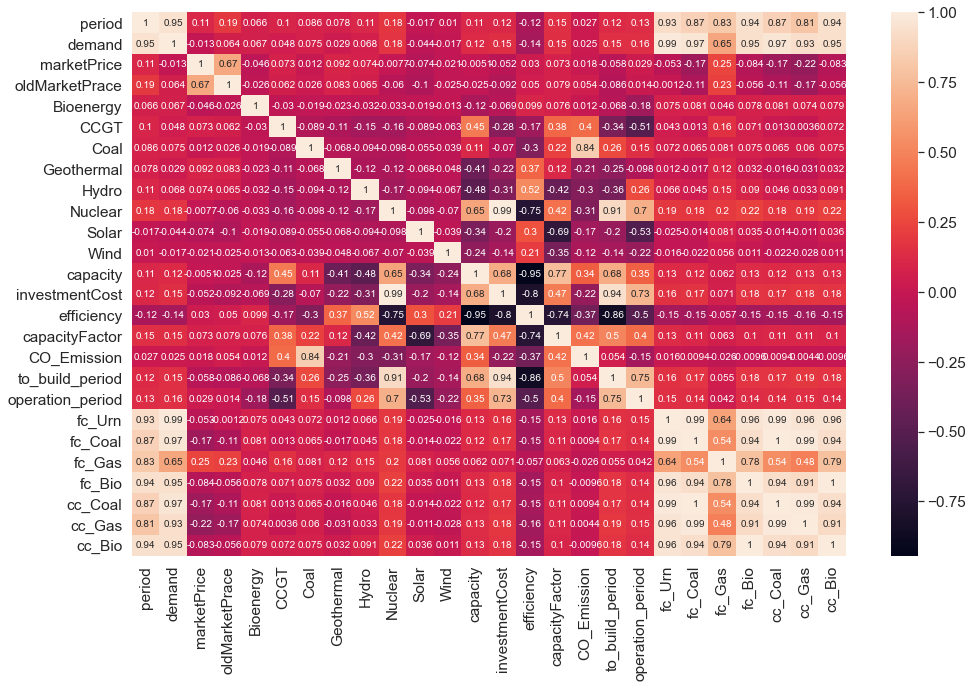

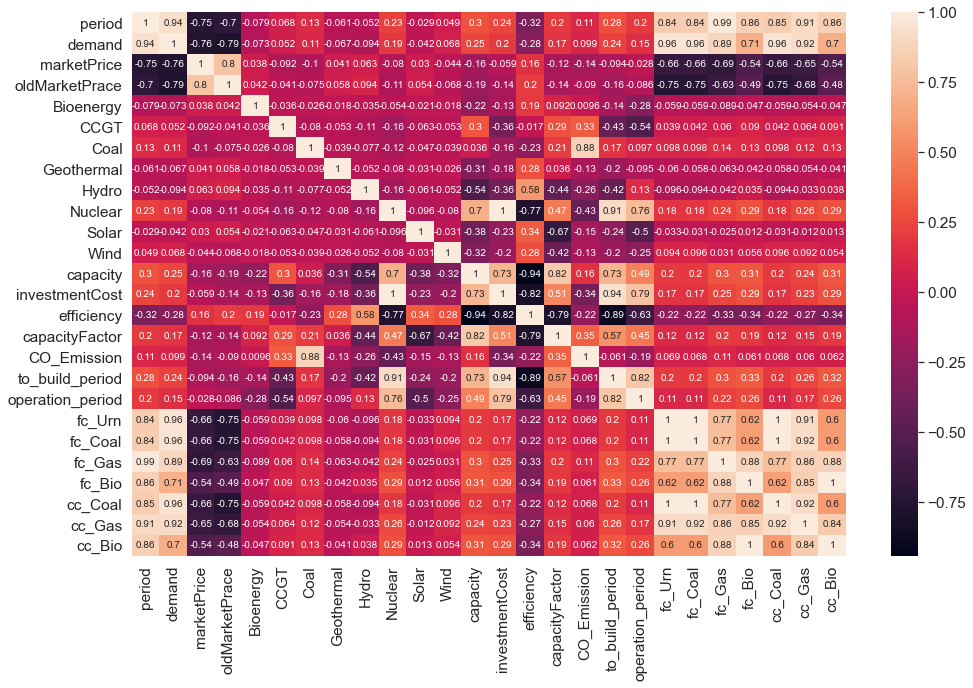

In [9]:
# Importing matplotlib and seaborn
%matplotlib inline
# Let's see the correlation matrix 
plt.figure(figsize = (16,10))     # Size of the figure
fig5 = sbn.heatmap(mPCorr1.corr(),annot = True).get_figure().savefig("[png]_heatmap/1.seans_heatmap.png",dpi =300)
plt.figure(figsize = (16,10)) 
fig6 = sbn.heatmap(mPCorr2.corr(),annot = True).get_figure().savefig("[png]_heatmap/2.seans_heatmap.png",dpi =300)
plt.figure(figsize = (16,10)) 
fig7 = sbn.heatmap(mPCorr3.corr(),annot = True).get_figure().savefig("[png]_heatmap/3.seans_heatmap.png",dpi =300)
plt.figure(figsize = (16,10)) 
fig8 = sbn.heatmap(mPCorr4.corr(),annot = True).get_figure().savefig("[png]_heatmap/4.seans_heatmap.png",dpi =300)


In [10]:
mPCorr1_NaN = mPCorr1.isnull().sum() # 1.seans NaN değerlerinin sayısı
mPCorr2_NaN = mPCorr2.isnull().sum() # 2.seans NaN değerlerinin sayısı
mPCorr3_NaN = mPCorr3.isnull().sum() # 3.seans NaN değerlerinin sayısı
mPCorr4_NaN = mPCorr4.isnull().sum() # 4.seans NaN değerlerinin sayısı
mPCorr_NaN =  pd.concat([mPCorr1_NaN,mPCorr2_NaN,mPCorr3_NaN,mPCorr4_NaN] , axis = 1 )
mPCorr_NaN.columns = ['1.Seans NaN','2.Seans NaN', '3.Seans NaN', '4.Seans NaN']
mPCorr_NaN.to_excel("Mpcorr[NaN]/mpcorr_NaN.xlsx")
# mPCorr_NaN

In [11]:
mPCorr1 = mPCorr1.dropna() # 1.seans Nan değerleri silme
mPCorr2 = mPCorr2.dropna() # 2.seans Nan değerleri silme
mPCorr3 = mPCorr3.dropna() # 3.seans Nan değerleri silme
mPCorr4 = mPCorr4.dropna() # 4.seans Nan değerleri silme


In [12]:
from sklearn.model_selection import train_test_split

liste = list(mPCorr1.columns)
liste.remove("marketPrice")

""" Not: x değişkeni herkes tarafından bilinen demand, yakıt fiyatları vb. olmalıdır. Fiyat tahmini yapılacak seneryoda 
oyuncuların verdidiği teklikler bilinenler içerisinde olmadığında x parametresine atanmamalıdır.
x bağımsız değişkenleri tek tek girilmelidir. Burada daha önce oluşturulan kolerasyon ve descipe çıktıları incelenerek 
karar verilebilir. Sonuca etkisi olmadığı düşünülen kısımların eklenmemesi tercih edilmelidir.
y = wx + b """
# y -> label 
y1 = mPCorr1["marketPrice"]
y2 = mPCorr2["marketPrice"]
y3 = mPCorr3["marketPrice"]
y4 = mPCorr4["marketPrice"]

# x -> feature (özellik)
x1 = mPCorr1[liste]
x2 = mPCorr2[liste]
x3 = mPCorr3[liste]
x4 = mPCorr4[liste]

x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1,test_size=0.33,random_state=15)
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2,test_size=0.33,random_state=15)
x3_train, x3_test, y3_train, y3_test = train_test_split(x3,y3,test_size=0.33,random_state=15)
x4_train, x4_test, y4_train, y4_test = train_test_split(x4,y4,test_size=0.33,random_state=15)

In [13]:
x_train = list()
x_train.append(x1_train.shape)
x_train.append(x2_train.shape)
x_train.append(x3_train.shape)
x_train.append(x4_train.shape)
print('x_train:',x_train)

x_train: [(1792, 25), (2240, 25), (1792, 25), (1642, 25)]


In [14]:
x_test = list()
x_test.append(x1_test.shape)
x_test.append(x2_test.shape)
x_test.append(x3_test.shape)
x_test.append(x4_test.shape)
print('x_test:',x_test)

x_test: [(883, 25), (1104, 25), (883, 25), (809, 25)]


In [15]:
y_train = list()
y_train.append(y1_train.shape)
y_train.append(y2_train.shape)
y_train.append(y3_train.shape)
y_train.append(y4_train.shape)
print('y_train:',y_train)

y_train: [(1792,), (2240,), (1792,), (1642,)]


In [16]:
y_test = list()
y_test.append(y1_test.shape)
y_test.append(y2_test.shape)
y_test.append(y3_test.shape)
y_test.append(y4_test.shape)
print('y_test:',y_test)

y_test: [(883,), (1104,), (883,), (809,)]


In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x1_train = scaler.fit_transform(x1_train)
x1_test = scaler.transform(x1_test)

x2_train = scaler.fit_transform(x2_train)
x2_test = scaler.transform(x2_test)

x3_train = scaler.fit_transform(x3_train)
x_test = scaler.transform(x3_test)

x4_train = scaler.fit_transform(x4_train)
x4_test = scaler.transform(x4_test)

In [18]:
# LinearRegression
from sklearn.linear_model import LinearRegression

linReg1 = LinearRegression()
linReg2 = LinearRegression()
linReg3 = LinearRegression()
linReg4 = LinearRegression()

linReg1.fit(x1_train, y1_train)
linReg2.fit(x2_train, y2_train)
linReg3.fit(x3_train, y3_train)
linReg4.fit(x4_train, y4_train)

LinearRegression()

In [19]:
#  Y = a + 𝑏1 * X1 + 𝑏2 * X2 + 𝑏3 * X3 + 𝑏4 * X4 + 𝑏5 * X5 + 𝑏6 * X6 + 𝑏7 * X7 + 𝑏8 * X8 + 𝑏9 * X9 + 𝑏10 * X10

# Katsayıların(coef_) değerleri nelerdir (b değerleri)? # linReg.coef_ numpy serisi
print('Coefficients_1(b): ', linReg1.coef_ ,'\nCoefficients_2(b): ', linReg2.coef_,'\nCoefficients_3(b): ', linReg3.coef_,'\nCoefficients_4(b): ', linReg4.coef_)

Coefficients_1(b):  [-1.40081240e+03  1.52959916e+03 -4.42023891e+01  2.99084236e-01
 -1.29049844e+00  2.03783118e+00 -1.02277198e+00 -7.60591533e-01
 -1.22180662e+00 -1.82913001e+00  3.78788301e+00  1.52839568e-01
 -9.35906033e-01 -6.19752825e-01  5.04800769e-01  2.16404092e+00
  1.36747509e-01 -1.50916684e-01 -9.27277286e+02 -2.37226018e+05
  6.88537106e+01  2.32971734e+04  2.38177116e+05  1.46495625e+01
 -2.35806731e+04] 
Coefficients_2(b):  [-9.71012645e+01  8.40835094e+01  1.01542635e+02  5.69466174e+14
  1.03892192e+15 -5.69505583e+14 -1.02584136e+15 -2.10789804e+15
 -2.63201104e+15 -7.14438281e+14 -1.10256498e+15 -1.48427682e+15
  3.44168071e+15  2.49125696e+14 -1.35753129e+15  5.07286021e+14
 -1.23840370e+15  2.83305993e+15 -2.17295336e+02  2.08543509e+03
  2.16053492e+02  8.54802094e+03 -1.44997461e+03 -3.22597910e+02
 -8.74558445e+03] 
Coefficients_3(b):  [ 2.71434215e+02 -3.53098198e+02  6.41903385e+01  5.21194073e+14
  1.89238062e+14 -3.13913343e+14 -2.09855987e+14 -5.98594

In [20]:
# Kesişmesinin(intercept_) değeri nedir (a değeri)?
print("linReg1.intercept(a): ", linReg1.intercept_ ,"\nlinReg2.intercept(a): ",linReg2.intercept_ ,"\nlinReg3.intercept(a): ",linReg3.intercept_ ,"\nlinReg4.intercept(a): ",linReg4.intercept_ )


linReg1.intercept(a):  292.79396552073536 
linReg2.intercept(a):  437482215149421.7 
linReg3.intercept(a):  -1446400810349612.5 
linReg4.intercept(a):  332725787882119.25


In [21]:
coef_df1 = pd.DataFrame(linReg1.coef_)
coef_df2 = pd.DataFrame(linReg2.coef_)
coef_df3 = pd.DataFrame(linReg3.coef_)
coef_df4 = pd.DataFrame(linReg4.coef_)
coef_df = pd.concat([coef_df1,coef_df2,coef_df3,coef_df4], axis = 1 )
coef_df.columns = ['Coefficients_1(b)','Coefficients_2(b)', 'Coefficients_3(b)', 'Coefficients_4(b)']
print(coef_df)

    Coefficients_1(b)  Coefficients_2(b)  Coefficients_3(b)  Coefficients_4(b)
0        -1400.812399      -9.710126e+01       2.714342e+02      -1.513300e+01
1         1529.599163       8.408351e+01      -3.530982e+02      -3.410439e+02
2          -44.202389       1.015426e+02       6.419034e+01       1.314660e+02
3            0.299084       5.694662e+14       5.211941e+14      -9.334903e+13
4           -1.290498       1.038922e+15       1.892381e+14      -2.676916e+14
5            2.037831      -5.695056e+14      -3.139133e+14      -1.887413e+13
6           -1.022772      -1.025841e+15      -2.098560e+14      -5.798217e+13
7           -0.760592      -2.107898e+15      -5.985943e+14      -2.864297e+13
8           -1.221807      -2.632011e+15      -8.177638e+14       8.918314e+13
9           -1.829130      -7.144383e+14       5.244694e+14      -5.317776e+13
10           3.787883      -1.102565e+15       1.650601e+14      -4.619001e+13
11           0.152840      -1.484277e+15       6.069

In [22]:
# Linear Regression
from sklearn.linear_model import LinearRegression
linReg1 = LinearRegression()
linReg2 = LinearRegression()
linReg3 = LinearRegression()
linReg4 = LinearRegression()

linReg1.fit(x1_train, y1_train)
linReg2.fit(x2_train, y2_train)
linReg3.fit(x3_train, y3_train)
linReg4.fit(x4_train, y4_train)

# Eğitim setini tahmin edilir. Kodun devamında MEA,MSE, RMSE ve R-kare değerlerine bakılır.

print("*********************Linear Regression TRAIN**********************************")
y1_trainTahminleri= linReg1.predict(x1_train)
y2_trainTahminleri= linReg2.predict(x2_train)
y3_trainTahminleri= linReg3.predict(x3_train)
y4_trainTahminleri= linReg4.predict(x4_train)

print("*********************1.Seans**********************************")
print('Mean Absolute Error_linReg1:', metrics.mean_absolute_error(y1_train, y1_trainTahminleri))  
print('Mean Squared Error_linReg1:', metrics.mean_squared_error(y1_train, y1_trainTahminleri))  
print('Root Mean Squared Error_linReg1:', np.sqrt(metrics.mean_squared_error(y1_train, y1_trainTahminleri)))
print('RSquared_linReg1:', r2_score(y1_train, y1_trainTahminleri))
print("*********************2.Seans**********************************")
print('Mean Absolute Error_linReg2:', metrics.mean_absolute_error(y2_train, y2_trainTahminleri))  
print('Mean Squared Error_linReg2:', metrics.mean_squared_error(y2_train, y2_trainTahminleri))  
print('Root Mean Squared Error_linReg2:', np.sqrt(metrics.mean_squared_error(y2_train, y2_trainTahminleri)))
print('RSquared_linReg2:', r2_score(y2_train, y2_trainTahminleri))
print("*********************3.Seans**********************************")
print('Mean Absolute Error_linReg3:', metrics.mean_absolute_error(y3_train, y3_trainTahminleri))  
print('Mean Squared Error_linReg3:', metrics.mean_squared_error(y3_train, y3_trainTahminleri))  
print('Root Mean Squared Error_linReg3:', np.sqrt(metrics.mean_squared_error(y3_train, y3_trainTahminleri)))
print('RSquared_linReg3:', r2_score(y3_train, y3_trainTahminleri))
print("*********************4.Seans**********************************")
print('Mean Absolute Error_linReg4:', metrics.mean_absolute_error(y4_train, y4_trainTahminleri))  
print('Mean Squared Error_linReg4:', metrics.mean_squared_error(y4_train, y4_trainTahminleri))  
print('Root Mean Squared Error_linReg4:', np.sqrt(metrics.mean_squared_error(y4_train, y4_trainTahminleri)))
print('RSquared_linReg4:', r2_score(y4_train, y4_trainTahminleri))

# TEST setini tahmin edilir. Kodun devamında MEA,MSE, RMSE ve R-kare değerlerine bakılır.

print("*********************Linear Regression TEST**********************************")
y1_testTahminleri= linReg1.predict(x1_test)
y2_testTahminleri= linReg2.predict(x2_test)
y3_testTahminleri= linReg3.predict(x3_test)
y4_testTahminleri= linReg4.predict(x4_test)

print("*********************1.Seans**********************************")
print('Mean Absolute Error_linReg1:', metrics.mean_absolute_error(y1_test, y1_testTahminleri))  
print('Mean Squared Error_linReg1:', metrics.mean_squared_error(y1_test, y1_testTahminleri))  
print('Root Mean Squared Error_linReg1:', np.sqrt(metrics.mean_squared_error(y1_test, y1_testTahminleri)))
print('RSquared_linReg1:', r2_score(y1_test, y1_testTahminleri))
print("*********************2.Seans**********************************")
print('Mean Absolute Error_linReg2:', metrics.mean_absolute_error(y2_test, y2_testTahminleri))  
print('Mean Squared Error_linReg2:', metrics.mean_squared_error(y2_test, y2_testTahminleri))  
print('Root Mean Squared Error_linReg2:', np.sqrt(metrics.mean_squared_error(y2_test, y2_testTahminleri)))
print('RSquared_linReg2:', r2_score(y2_test, y2_testTahminleri))
print("*********************3.Seans**********************************")
print('Mean Absolute Error_linReg3:', metrics.mean_absolute_error(y3_test, y3_testTahminleri))  
print('Mean Squared Error_linReg3:', metrics.mean_squared_error(y3_test, y3_testTahminleri))  
print('Root Mean Squared Error_linReg3:', np.sqrt(metrics.mean_squared_error(y3_test, y3_testTahminleri)))
print('RSquared_linReg3:', r2_score(y3_test, y3_testTahminleri))
print("*********************4.Seans**********************************")
print('Mean Absolute Error_linReg4:', metrics.mean_absolute_error(y4_test, y4_testTahminleri))  
print('Mean Squared Error_linReg4:', metrics.mean_squared_error(y4_test, y4_testTahminleri))  
print('Root Mean Squared Error_linReg4:', np.sqrt(metrics.mean_squared_error(y4_test, y4_testTahminleri)))
print('RSquared_linReg4:', r2_score(y4_test, y4_testTahminleri))
print("*******************************************************")


*********************Linear Regression TRAIN**********************************
*********************1.Seans**********************************
Mean Absolute Error_linReg1: 22.101938198758088
Mean Squared Error_linReg1: 1231.677984870439
Root Mean Squared Error_linReg1: 35.095270121063876
RSquared_linReg1: 0.83992271798902
*********************2.Seans**********************************
Mean Absolute Error_linReg2: 27.626897321428572
Mean Squared Error_linReg2: 1840.702134486607
Root Mean Squared Error_linReg2: 42.90340469574189
RSquared_linReg2: 0.7234225707984064
*********************3.Seans**********************************
Mean Absolute Error_linReg3: 19.648856026785715
Mean Squared Error_linReg3: 1024.814488002232
Root Mean Squared Error_linReg3: 32.0127238454061
RSquared_linReg3: 0.8231992345499112
*********************4.Seans**********************************
Mean Absolute Error_linReg4: 31.241473812423873
Mean Squared Error_linReg4: 1554.2229655146164
Root Mean Squared Error_linReg

### Linear regression 1.seans için
Yukarıdaki çıktı, 1 Seans iki değerlendirme metriğinden biri olan RMSE'nin train verileri için 1231.677984870439 ve test verileri için 1200.9248838189199 olduğunu göstermektedir. Öte yandan, train verileri için R-kare değeri yüzde 0.83992271798902 ve test verileri için yüzde 0.8414403676721243'tür, bu iyi bir performanstır.

In [23]:
# suppert vector regression
from sklearn.svm import SVR

supReg1 = SVR(kernel='rbf')
supReg2 = SVR(kernel='rbf')
supReg3 = SVR(kernel='rbf')
supReg4 = SVR(kernel='rbf')

supReg1.fit(x1_train,y1_train)
supReg2.fit(x2_train,y2_train)
supReg3.fit(x3_train,y3_train)
supReg4.fit(x4_train,y4_train)


#Predict the response for test dataset
print("*********************Suppert Vector Regression TRAİN**********************************")
y1_testTahminleri = supReg1.predict(x1_train)
y2_testTahminleri = supReg2.predict(x2_train)
y3_testTahminleri = supReg3.predict(x3_train)
y4_testTahminleri = supReg4.predict(x4_train)

print("*********************1.Seans**********************************")
print('Mean Absolute Error_supReg1:', metrics.mean_absolute_error(y1_train, y1_testTahminleri))  
print('Mean Squared Error_supReg1:', metrics.mean_squared_error(y1_train, y1_testTahminleri))  
print('Root Mean Squared Error_supReg1:', np.sqrt(metrics.mean_squared_error(y1_train, y1_testTahminleri)))
print('RSquared_supReg1:', r2_score(y1_train, y1_testTahminleri))
print("*********************2.Seans**********************************")
print('Mean Absolute Error_supReg2:', metrics.mean_absolute_error(y2_train, y2_testTahminleri))  
print('Mean Squared Error_supReg2:', metrics.mean_squared_error(y2_train, y2_testTahminleri))  
print('Root Mean Squared Error_supReg2:', np.sqrt(metrics.mean_squared_error(y2_train, y2_testTahminleri)))
print('RSquared_supReg2:', r2_score(y2_train, y2_testTahminleri))
print("*********************3.Seans**********************************")
print('Mean Absolute Error_supReg3:', metrics.mean_absolute_error(y3_train, y3_testTahminleri))  
print('Mean Squared Error_supReg3:', metrics.mean_squared_error(y3_train, y3_testTahminleri))  
print('Root Mean Squared Error_supReg3:', np.sqrt(metrics.mean_squared_error(y3_train, y3_testTahminleri)))
print('RSquared_supReg3:', r2_score(y3_train, y3_testTahminleri))
print("*********************4.Seans**********************************")
print('Mean Absolute Error_supReg4:', metrics.mean_absolute_error(y4_train, y4_testTahminleri))  
print('Mean Squared Error_supReg4:', metrics.mean_squared_error(y4_train, y4_testTahminleri))  
print('Root Mean Squared Error_supReg4:', np.sqrt(metrics.mean_squared_error(y4_train, y4_testTahminleri)))
print('RSquared_supReg4:', r2_score(y4_train, y4_testTahminleri))
print("*******************************************************")

print("*********************Suppert Vector Regression TEST**********************************")
y1_testTahminleri = supReg1.predict(x1_test)
y2_testTahminleri = supReg2.predict(x2_test)
y3_testTahminleri = supReg3.predict(x3_test)
y4_testTahminleri = supReg4.predict(x4_test)

print("*********************1.Seans**********************************")
print('Mean Absolute Error_supReg1:', metrics.mean_absolute_error(y1_test, y1_testTahminleri))  
print('Mean Squared Error_supReg1:', metrics.mean_squared_error(y1_test, y1_testTahminleri))  
print('Root Mean Squared Error_supReg1:', np.sqrt(metrics.mean_squared_error(y1_test, y1_testTahminleri)))
print('RSquared_supReg1:', r2_score(y1_test, y1_testTahminleri))
print("*********************2.Seans**********************************")
print('Mean Absolute Error_supReg2:', metrics.mean_absolute_error(y2_test, y2_testTahminleri))  
print('Mean Squared Error_supReg2:', metrics.mean_squared_error(y2_test, y2_testTahminleri))  
print('Root Mean Squared Error_supReg2:', np.sqrt(metrics.mean_squared_error(y2_test, y2_testTahminleri)))
print('RSquared_supReg2:', r2_score(y2_test, y2_testTahminleri))
print("*********************3.Seans**********************************")
print('Mean Absolute Error_supReg3:', metrics.mean_absolute_error(y3_test, y3_testTahminleri))  
print('Mean Squared Error_supReg3:', metrics.mean_squared_error(y3_test, y3_testTahminleri))  
print('Root Mean Squared Error_supReg3:', np.sqrt(metrics.mean_squared_error(y3_test, y3_testTahminleri)))
print('RSquared_supReg3:', r2_score(y3_test, y3_testTahminleri))
print("*********************4.Seans**********************************")
print('Mean Absolute Error_supReg4:', metrics.mean_absolute_error(y4_test, y4_testTahminleri))  
print('Mean Squared Error_supReg4:', metrics.mean_squared_error(y4_test, y4_testTahminleri))  
print('Root Mean Squared Error_supReg4:', np.sqrt(metrics.mean_squared_error(y4_test, y4_testTahminleri)))
print('RSquared_supReg4:', r2_score(y4_test, y4_testTahminleri))
print("*******************************************************")

*********************Suppert Vector Regression TRAİN**********************************
*********************1.Seans**********************************
Mean Absolute Error_supReg1: 35.756746370772355
Mean Squared Error_supReg1: 2817.0960093044764
Root Mean Squared Error_supReg1: 53.0763224922797
RSquared_supReg1: 0.6338709647547406
*********************2.Seans**********************************
Mean Absolute Error_supReg2: 45.04175682421872
Mean Squared Error_supReg2: 5409.963737591063
Root Mean Squared Error_supReg2: 73.55245568702016
RSquared_supReg2: 0.1871178749764918
*********************3.Seans**********************************
Mean Absolute Error_supReg3: 34.188440423960095
Mean Squared Error_supReg3: 3490.444214777057
Root Mean Squared Error_supReg3: 59.079981506234894
RSquared_supReg3: 0.3978293474983797
*********************4.Seans**********************************
Mean Absolute Error_supReg4: 38.79668388449814
Mean Squared Error_supReg4: 2267.7812432126893
Root Mean Squared Err

In [24]:
# Gradient Boosting Regressor
from sklearn import ensemble
params = {
    'n_estimators': 1,
    'max_depth': 1,
    'learning_rate': 1,
    'criterion': 'mse'
}

gbregressor1 = ensemble.GradientBoostingRegressor(**params)
gbregressor2 = ensemble.GradientBoostingRegressor(**params)
gbregressor3 = ensemble.GradientBoostingRegressor(**params)
gbregressor4 = ensemble.GradientBoostingRegressor(**params)

gbregressor1.fit(x1_train,y1_train)
gbregressor2.fit(x2_train,y2_train)
gbregressor3.fit(x3_train,y3_train)
gbregressor4.fit(x4_train,y4_train)

# Predict model to test data
print("*********************Gradient Boosting Regressor TRAİN**********************************")
y1_testTahminleri = gbregressor1.predict(x1_train)
y2_testTahminleri = gbregressor2.predict(x2_train)
y3_testTahminleri = gbregressor3.predict(x3_train)
y4_testTahminleri = gbregressor4.predict(x4_train)


print("*********************1.Seans**********************************")
print('Mean Absolute Error_gbregressor1:', metrics.mean_absolute_error(y1_train, y1_testTahminleri))  
print('Mean Squared Error_gbregressor1:', metrics.mean_squared_error(y1_train, y1_testTahminleri))  
print('Root Mean Squared Error_gbregressor1:', np.sqrt(metrics.mean_squared_error(y1_train, y1_testTahminleri)))
print('RSquared_gbregressor1:', r2_score(y1_train, y1_testTahminleri))
print("*********************2.Seans**********************************")
print('Mean Absolute Error_gbregressor2:', metrics.mean_absolute_error(y2_train, y2_testTahminleri))  
print('Mean Squared Error_gbregressor2:', metrics.mean_squared_error(y2_train, y2_testTahminleri))  
print('Root Mean Squared Error_gbregressor2:', np.sqrt(metrics.mean_squared_error(y2_train, y2_testTahminleri)))
print('RSquared_gbregressor2:', r2_score(y2_train, y2_testTahminleri))
print("*********************3.Seans**********************************")
print('Mean Absolute Error_gbregressor3:', metrics.mean_absolute_error(y3_train, y3_testTahminleri))  
print('Mean Squared Error_gbregressor3:', metrics.mean_squared_error(y3_train, y3_testTahminleri))  
print('Root Mean Squared Error_gbregressor3:', np.sqrt(metrics.mean_squared_error(y3_train, y3_testTahminleri)))
print('RSquared_gbregressor3:', r2_score(y3_train, y3_testTahminleri))
print("*********************4.Seans**********************************")
print('Mean Absolute Error_gbregressor4:', metrics.mean_absolute_error(y4_train, y4_testTahminleri))  
print('Mean Squared Error_gbregressor4:', metrics.mean_squared_error(y4_train, y4_testTahminleri))  
print('Root Mean Squared Error_gbregressor4:', np.sqrt(metrics.mean_squared_error(y4_train, y4_testTahminleri)))
print('RSquared_gbregressor4:', r2_score(y4_train, y4_testTahminleri))
print("*******************************************************")


# Predict model to test data
print("*********************Gradient Boosting Regressor TEST**********************************")
y1_testTahminleri = gbregressor1.predict(x1_test)
y2_testTahminleri = gbregressor2.predict(x2_test)
y3_testTahminleri = gbregressor3.predict(x3_test)
y4_testTahminleri = gbregressor4.predict(x4_test)

print("*********************1.Seans**********************************")
print('Mean Absolute Error_gbregressor1:', metrics.mean_absolute_error(y1_test, y1_testTahminleri))  
print('Mean Squared Error_gbregressor1:', metrics.mean_squared_error(y1_test, y1_testTahminleri))  
print('Root Mean Squared Error_gbregressor1:', np.sqrt(metrics.mean_squared_error(y1_test, y1_testTahminleri)))
print('RSquared_gbregressor1:', r2_score(y1_test, y1_testTahminleri))
print("*********************2.Seans**********************************")
print('Mean Absolute Error_gbregressor2:', metrics.mean_absolute_error(y2_test, y2_testTahminleri))  
print('Mean Squared Error_gbregressor2:', metrics.mean_squared_error(y2_test, y2_testTahminleri))  
print('Root Mean Squared Error_gbregressor2:', np.sqrt(metrics.mean_squared_error(y2_test, y2_testTahminleri)))
print('RSquared_gbregressor2:', r2_score(y2_test, y2_testTahminleri))
print("*********************3.Seans**********************************")
print('Mean Absolute Error_gbregressor3:', metrics.mean_absolute_error(y3_test, y3_testTahminleri))  
print('Mean Squared Error_gbregressor3:', metrics.mean_squared_error(y3_test, y3_testTahminleri))  
print('Root Mean Squared Error_gbregressor3:', np.sqrt(metrics.mean_squared_error(y3_test, y3_testTahminleri)))
print('RSquared_gbregressor3:', r2_score(y3_test, y3_testTahminleri))
print("*********************4.Seans**********************************")
print('Mean Absolute Error_gbregressor4:', metrics.mean_absolute_error(y4_test, y4_testTahminleri))  
print('Mean Squared Error_gbregressor4:', metrics.mean_squared_error(y4_test, y4_testTahminleri))  
print('Root Mean Squared Error_gbregressor4:', np.sqrt(metrics.mean_squared_error(y4_test, y4_testTahminleri)))
print('RSquared_gbregressor4:', r2_score(y4_test, y4_testTahminleri))
print("*******************************************************")

*********************Gradient Boosting Regressor TRAİN**********************************
*********************1.Seans**********************************
Mean Absolute Error_gbregressor1: 38.93520145271838
Mean Squared Error_gbregressor1: 2877.0033665387914
Root Mean Squared Error_gbregressor1: 53.63770470982881
RSquared_gbregressor1: 0.6260849955027703
*********************2.Seans**********************************
Mean Absolute Error_gbregressor2: 35.05980420584746
Mean Squared Error_gbregressor2: 2826.8338646185357
Root Mean Squared Error_gbregressor2: 53.167977812011394
RSquared_gbregressor2: 0.5752498851345855
*********************3.Seans**********************************
Mean Absolute Error_gbregressor3: 30.641094301065
Mean Squared Error_gbregressor3: 2169.277640472497
Root Mean Squared Error_gbregressor3: 46.57550472590176
RSquared_gbregressor3: 0.625756708360992
*********************4.Seans**********************************
Mean Absolute Error_gbregressor4: 32.26480155697513
Mean

In [25]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logReg1 = LogisticRegression(random_state=0)
logReg2 = LogisticRegression(random_state=0)
logReg3 = LogisticRegression(random_state=0)
logReg4 = LogisticRegression(random_state=0)


logReg1.fit(x1_train,y1_train)
logReg2.fit(x2_train,y2_train)
logReg3.fit(x3_train,y3_train)
logReg4.fit(x4_train,y4_train)

print("*********************Logistic Regression TRAİN**********************************")
y1_testTahminleri = logReg1.predict(x1_train)
y2_testTahminleri = logReg2.predict(x2_train)
y3_testTahminleri = logReg3.predict(x3_train)
y4_testTahminleri = logReg4.predict(x4_train)

print("*********************1.Seans**********************************")
print('Mean Absolute Error_logReg1:', metrics.mean_absolute_error(y1_train, y1_testTahminleri))  
print('Mean Squared Error_logReg1:', metrics.mean_squared_error(y1_train, y1_testTahminleri))  
print('Root Mean Squared Error_logReg1:', np.sqrt(metrics.mean_squared_error(y1_train, y1_testTahminleri)))
print('RSquared_logReg1:', r2_score(y1_train, y1_testTahminleri))
print("*********************2.Seans**********************************")
print('Mean Absolute Error_logReg2:', metrics.mean_absolute_error(y2_train, y2_testTahminleri))  
print('Mean Squared Error_logReg2:', metrics.mean_squared_error(y2_train, y2_testTahminleri))  
print('Root Mean Squared Error_logReg2:', np.sqrt(metrics.mean_squared_error(y2_train, y2_testTahminleri)))
print('RSquared_logReg2:', r2_score(y2_train, y2_testTahminleri))
print("*********************3.Seans**********************************")
print('Mean Absolute Error_logReg3:', metrics.mean_absolute_error(y3_train, y3_testTahminleri))  
print('Mean Squared Error_logReg3:', metrics.mean_squared_error(y3_train, y3_testTahminleri))  
print('Root Mean Squared Error_logReg3:', np.sqrt(metrics.mean_squared_error(y3_train, y3_testTahminleri)))
print('RSquared_logReg3:', r2_score(y3_train, y3_testTahminleri))
print("*********************4.Seans**********************************")
print('Mean Absolute Error_logReg4:', metrics.mean_absolute_error(y4_train, y4_testTahminleri))  
print('Mean Squared Error_logReg4:', metrics.mean_squared_error(y4_train, y4_testTahminleri))  
print('Root Mean Squared Error_logReg4:', np.sqrt(metrics.mean_squared_error(y4_train, y4_testTahminleri)))
print('RSquared_logReg4:', r2_score(y4_train, y4_testTahminleri))
print("*******************************************************")

print("*********************Logistic Regression TEST**********************************")
y1_testTahminleri = logReg1.predict(x1_test)
y2_testTahminleri = logReg2.predict(x2_test)
y3_testTahminleri = logReg3.predict(x3_test)
y4_testTahminleri = logReg4.predict(x4_test)

print("*********************1.Seans**********************************")
print('Mean Absolute Error_logReg1:', metrics.mean_absolute_error(y1_test, y1_testTahminleri))  
print('Mean Squared Error_logReg1:', metrics.mean_squared_error(y1_test, y1_testTahminleri))  
print('Root Mean Squared Error_logReg1:', np.sqrt(metrics.mean_squared_error(y1_test, y1_testTahminleri)))
print('RSquared_logReg1:', r2_score(y1_test, y1_testTahminleri))
print("*********************2.Seans**********************************")
print('Mean Absolute Error_logReg2:', metrics.mean_absolute_error(y2_test, y2_testTahminleri))  
print('Mean Squared Error_logReg2:', metrics.mean_squared_error(y2_test, y2_testTahminleri))  
print('Root Mean Squared Error_logReg2:', np.sqrt(metrics.mean_squared_error(y2_test, y2_testTahminleri)))
print('RSquared_logReg2:', r2_score(y2_test, y2_testTahminleri))
print("*********************3.Seans**********************************")
print('Mean Absolute Error_logReg3:', metrics.mean_absolute_error(y3_test, y3_testTahminleri))  
print('Mean Squared Error_logReg3:', metrics.mean_squared_error(y3_test, y3_testTahminleri))  
print('Root Mean Squared Error_logReg3:', np.sqrt(metrics.mean_squared_error(y3_test, y3_testTahminleri)))
print('RSquared_logReg3:', r2_score(y3_test, y3_testTahminleri))
print("*********************4.Seans**********************************")
print('Mean Absolute Error_logReg4:', metrics.mean_absolute_error(y4_test, y4_testTahminleri))  
print('Mean Squared Error_logReg4:', metrics.mean_squared_error(y4_test, y4_testTahminleri))  
print('Root Mean Squared Error_logReg4:', np.sqrt(metrics.mean_squared_error(y4_test, y4_testTahminleri)))
print('RSquared_logReg4:', r2_score(y4_test, y4_testTahminleri))
print("*******************************************************")

C:\Users\omerp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\omerp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

*********************Logistic Regression TRAİN**********************************
*********************1.Seans**********************************
Mean Absolute Error_logReg1: 14.112723214285714
Mean Squared Error_logReg1: 1971.482142857143
Root Mean Squared Error_logReg1: 44.40137546132037
RSquared_logReg1: 0.7437727175135381
*********************2.Seans**********************************
Mean Absolute Error_logReg2: 14.839285714285714
Mean Squared Error_logReg2: 2091.3678571428572
Root Mean Squared Error_logReg2: 45.73147556271126
RSquared_logReg2: 0.6857584208730511
*********************3.Seans**********************************
Mean Absolute Error_logReg3: 17.475446428571427
Mean Squared Error_logReg3: 2431.6696428571427
Root Mean Squared Error_logReg3: 49.311962472174464
RSquared_logReg3: 0.5804888990035915
*********************4.Seans**********************************
Mean Absolute Error_logReg4: 23.49573690621194
Mean Squared Error_logReg4: 2362.8258221680876
Root Mean Squared Error_

C:\Users\omerp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
#  GaussianNB
from sklearn.naive_bayes import GaussianNB

gauReg1 = GaussianNB()
gauReg2 = GaussianNB()
gauReg3 = GaussianNB()
gauReg4 = GaussianNB()

gauReg1.fit(x1_train, y1_train)
gauReg2.fit(x2_train, y2_train)
gauReg3.fit(x3_train, y3_train)
gauReg4.fit(x4_train, y4_train)

print("*********************GaussianNB TRAİN**********************************")
y1_testTahminleri = gauReg1.predict(x1_train)
y2_testTahminleri = gauReg2.predict(x2_train)
y3_testTahminleri = gauReg3.predict(x3_train)
y4_testTahminleri = gauReg4.predict(x4_train)

print("*********************1.Seans**********************************")
print('Mean Absolute Error_gauReg1:', metrics.mean_absolute_error(y1_train, y1_testTahminleri))  
print('Mean Squared Error_gauReg1:', metrics.mean_squared_error(y1_train, y1_testTahminleri))  
print('Root Mean Squared Error_gauReg1:', np.sqrt(metrics.mean_squared_error(y1_train, y1_testTahminleri)))
print('RSquared_gauReg1:', r2_score(y1_train, y1_testTahminleri))
print("*********************2.Seans**********************************")
print('Mean Absolute Error_gauReg2:', metrics.mean_absolute_error(y2_train, y2_testTahminleri))  
print('Mean Squared Error_gauReg2:', metrics.mean_squared_error(y2_train, y2_testTahminleri))  
print('Root Mean Squared Error_gauReg2:', np.sqrt(metrics.mean_squared_error(y2_train, y2_testTahminleri)))
print('RSquared_gauReg2:', r2_score(y2_train, y2_testTahminleri))
print("*********************3.Seans**********************************")
print('Mean Absolute Error_gauReg3:', metrics.mean_absolute_error(y3_train, y3_testTahminleri))  
print('Mean Squared Error_gauReg3:', metrics.mean_squared_error(y3_train, y3_testTahminleri))  
print('Root Mean Squared Error_gauReg3:', np.sqrt(metrics.mean_squared_error(y3_train, y3_testTahminleri)))
print('RSquared_gauReg3:', r2_score(y3_train, y3_testTahminleri))
print("*********************4.Seans**********************************")
print('Mean Absolute Error_gauReg4:', metrics.mean_absolute_error(y4_train, y4_testTahminleri))  
print('Mean Squared Error_gauReg4:', metrics.mean_squared_error(y4_train, y4_testTahminleri))  
print('Root Mean Squared Error_gauReg4:', np.sqrt(metrics.mean_squared_error(y4_train, y4_testTahminleri)))
print('RSquared_gauReg4:', r2_score(y4_train, y4_testTahminleri))
print("*******************************************************")

print("*********************GaussianNB TEST**********************************")
y1_testTahminleri = gauReg1.predict(x1_test)
y2_testTahminleri = gauReg2.predict(x2_test)
y3_testTahminleri = gauReg3.predict(x3_test)
y4_testTahminleri = gauReg4.predict(x4_test)

print("*********************1.Seans**********************************")
print('Mean Absolute Error_gauReg1:', metrics.mean_absolute_error(y1_test, y1_testTahminleri))  
print('Mean Squared Error_gauReg1:', metrics.mean_squared_error(y1_test, y1_testTahminleri))  
print('Root Mean Squared Error_gauReg1:', np.sqrt(metrics.mean_squared_error(y1_test, y1_testTahminleri)))
print('RSquared_gauReg1:', r2_score(y1_test, y1_testTahminleri))
print("*********************2.Seans**********************************")
print('Mean Absolute Error_gauReg2:', metrics.mean_absolute_error(y2_test, y2_testTahminleri))  
print('Mean Squared Error_gauReg2:', metrics.mean_squared_error(y2_test, y2_testTahminleri))  
print('Root Mean Squared Error_gauReg2:', np.sqrt(metrics.mean_squared_error(y2_test, y2_testTahminleri)))
print('RSquared_gauReg2:', r2_score(y2_test, y2_testTahminleri))
print("*********************3.Seans**********************************")
print('Mean Absolute Error_gauReg3:', metrics.mean_absolute_error(y3_test, y3_testTahminleri))  
print('Mean Squared Error_gauReg3:', metrics.mean_squared_error(y3_test, y3_testTahminleri))  
print('Root Mean Squared Error_gauReg3:', np.sqrt(metrics.mean_squared_error(y3_test, y3_testTahminleri)))
print('RSquared_gauReg3:', r2_score(y3_test, y3_testTahminleri))
print("*********************4.Seans**********************************")
print('Mean Absolute Error_gauReg4:', metrics.mean_absolute_error(y4_test, y4_testTahminleri))  
print('Mean Squared Error_gauReg4:', metrics.mean_squared_error(y4_test, y4_testTahminleri))  
print('Root Mean Squared Error_gauReg4:', np.sqrt(metrics.mean_squared_error(y4_test, y4_testTahminleri)))
print('RSquared_gauReg4:', r2_score(y4_test, y4_testTahminleri))
print("*******************************************************")

*********************GaussianNB TRAİN**********************************
*********************1.Seans**********************************
Mean Absolute Error_gauReg1: 25.016183035714285
Mean Squared Error_gauReg1: 3851.4793526785716
Root Mean Squared Error_gauReg1: 62.06028804862713
RSquared_gauReg1: 0.49943544167264786
*********************2.Seans**********************************
Mean Absolute Error_gauReg2: 5.676785714285714
Mean Squared Error_gauReg2: 1061.5589285714286
Root Mean Squared Error_gauReg2: 32.58157345143768
RSquared_gauReg2: 0.840493888766977
*********************3.Seans**********************************
Mean Absolute Error_gauReg3: 18.982700892857142
Mean Squared Error_gauReg3: 3307.242745535714
Root Mean Squared Error_gauReg3: 57.50863192196206
RSquared_gauReg3: 0.42943522385224697
*********************4.Seans**********************************
Mean Absolute Error_gauReg4: 19.674177831912303
Mean Squared Error_gauReg4: 2106.2880633373934
Root Mean Squared Error_gauReg4: 

In [27]:
# KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

knnClas1 = KNeighborsClassifier(n_neighbors=1, metric='minkowski')
knnClas2 = KNeighborsClassifier(n_neighbors=1, metric='minkowski')
knnClas3 = KNeighborsClassifier(n_neighbors=1, metric='minkowski')
knnClas4 = KNeighborsClassifier(n_neighbors=1, metric='minkowski')

knnClas1.fit(x1_train,y1_train)
knnClas2.fit(x2_train,y2_train)
knnClas3.fit(x3_train,y3_train)
knnClas4.fit(x4_train,y4_train)

print("*********************KNeighborsClassifier TRAİN**********************************")
y1_testTahminleri = knnClas1.predict(x1_train)
y2_testTahminleri = knnClas2.predict(x2_train)
y3_testTahminleri = knnClas3.predict(x3_train)
y4_testTahminleri = knnClas4.predict(x4_train)

print("*********************1.Seans**********************************")
print('Mean Absolute Error_knnClas1:', metrics.mean_absolute_error(y1_train, y1_testTahminleri))  
print('Mean Squared Error_knnClas1:', metrics.mean_squared_error(y1_train, y1_testTahminleri))  
print('Root Mean Squared Error_knnClas1:', np.sqrt(metrics.mean_squared_error(y1_train, y1_testTahminleri)))
print('RSquared_knnClas1:', r2_score(y1_train, y1_testTahminleri))
print("*********************2.Seans**********************************")
print('Mean Absolute Error_knnClas2:', metrics.mean_absolute_error(y2_train, y2_testTahminleri))  
print('Mean Squared Error_knnClas2:', metrics.mean_squared_error(y2_train, y2_testTahminleri))  
print('Root Mean Squared Error_knnClas2:', np.sqrt(metrics.mean_squared_error(y2_train, y2_testTahminleri)))
print('RSquared_knnClas2:', r2_score(y2_train, y2_testTahminleri))
print("*********************3.Seans**********************************")
print('Mean Absolute Error_knnClas3:', metrics.mean_absolute_error(y3_train, y3_testTahminleri))  
print('Mean Squared Error_knnClas3:', metrics.mean_squared_error(y3_train, y3_testTahminleri))  
print('Root Mean Squared Error_knnClas3:', np.sqrt(metrics.mean_squared_error(y3_train, y3_testTahminleri)))
print('RSquared_knnClas3:', r2_score(y3_train, y3_testTahminleri))
print("*********************4.Seans**********************************")
print('Mean Absolute Error_knnClas4:', metrics.mean_absolute_error(y4_train, y4_testTahminleri))  
print('Mean Squared Error_knnClas4:', metrics.mean_squared_error(y4_train, y4_testTahminleri))  
print('Root Mean Squared Error_knnClas4:', np.sqrt(metrics.mean_squared_error(y4_train, y4_testTahminleri)))
print('RSquared_knnClas4:', r2_score(y4_train, y4_testTahminleri))
print("*******************************************************")

print("*********************KNeighborsClassifier TEST**********************************")
y1_testTahminleri = knnClas1.predict(x1_test)
y2_testTahminleri = knnClas2.predict(x2_test)
y3_testTahminleri = knnClas3.predict(x3_test)
y4_testTahminleri = knnClas4.predict(x4_test)

print("*********************1.Seans**********************************")
print('Mean Absolute Error_knnClas1:', metrics.mean_absolute_error(y1_test, y1_testTahminleri))  
print('Mean Squared Error_knnClas1:', metrics.mean_squared_error(y1_test, y1_testTahminleri))  
print('Root Mean Squared Error_knnClas1:', np.sqrt(metrics.mean_squared_error(y1_test, y1_testTahminleri)))
print('RSquared_knnClas1:', r2_score(y1_test, y1_testTahminleri))
print("*********************2.Seans**********************************")
print('Mean Absolute Error_knnClas2:', metrics.mean_absolute_error(y2_test, y2_testTahminleri))  
print('Mean Squared Error_knnClas2:', metrics.mean_squared_error(y2_test, y2_testTahminleri))  
print('Root Mean Squared Error_knnClas2:', np.sqrt(metrics.mean_squared_error(y2_test, y2_testTahminleri)))
print('RSquared_knnClas2:', r2_score(y2_test, y2_testTahminleri))
print("*********************3.Seans**********************************")
print('Mean Absolute Error_knnClas3:', metrics.mean_absolute_error(y3_test, y3_testTahminleri))  
print('Mean Squared Error_knnClas3:', metrics.mean_squared_error(y3_test, y3_testTahminleri))  
print('Root Mean Squared Error_knnClas3:', np.sqrt(metrics.mean_squared_error(y3_test, y3_testTahminleri)))
print('RSquared_knnClas3:', r2_score(y3_test, y3_testTahminleri))
print("*********************4.Seans**********************************")
print('Mean Absolute Error_knnClas4:', metrics.mean_absolute_error(y4_test, y4_testTahminleri))  
print('Mean Squared Error_knnClas4:', metrics.mean_squared_error(y4_test, y4_testTahminleri))  
print('Root Mean Squared Error_knnClas4:', np.sqrt(metrics.mean_squared_error(y4_test, y4_testTahminleri)))
print('RSquared_knnClas4:', r2_score(y4_test, y4_testTahminleri))
print("*******************************************************")

*********************KNeighborsClassifier TRAİN**********************************
*********************1.Seans**********************************
Mean Absolute Error_knnClas1: 0.0
Mean Squared Error_knnClas1: 0.0
Root Mean Squared Error_knnClas1: 0.0
RSquared_knnClas1: 1.0
*********************2.Seans**********************************
Mean Absolute Error_knnClas2: 0.0
Mean Squared Error_knnClas2: 0.0
Root Mean Squared Error_knnClas2: 0.0
RSquared_knnClas2: 1.0
*********************3.Seans**********************************
Mean Absolute Error_knnClas3: 0.0
Mean Squared Error_knnClas3: 0.0
Root Mean Squared Error_knnClas3: 0.0
RSquared_knnClas3: 1.0
*********************4.Seans**********************************
Mean Absolute Error_knnClas4: 0.0
Mean Squared Error_knnClas4: 0.0
Root Mean Squared Error_knnClas4: 0.0
RSquared_knnClas4: 1.0
*******************************************************
*********************KNeighborsClassifier TEST**********************************
*****************

In [28]:
#support vector classifier

from sklearn.svm import SVC

supClas1 = SVC(kernel='rbf')
supClas2 = SVC(kernel='rbf')
supClas3 = SVC(kernel='rbf')
supClas4 = SVC(kernel='rbf')

supClas1.fit(x1_train,y1_train)
supClas2.fit(x2_train,y2_train)
supClas3.fit(x3_train,y3_train)
supClas4.fit(x4_train,y4_train)

print("*********************Support Vector Classifier TRAİN**********************************")
y1_testTahminleri = supClas1.predict(x1_train)
y2_testTahminleri = supClas2.predict(x2_train)
y3_testTahminleri = supClas3.predict(x3_train)
y4_testTahminleri = supClas4.predict(x4_train)

print("*********************1.Seans**********************************")
print('Mean Absolute Error_supClas1:', metrics.mean_absolute_error(y1_train, y1_testTahminleri))  
print('Mean Squared Error_supClas1:', metrics.mean_squared_error(y1_train, y1_testTahminleri))  
print('Root Mean Squared Error_supClas1:', np.sqrt(metrics.mean_squared_error(y1_train, y1_testTahminleri)))
print('RSquared_supClas1:', r2_score(y1_train, y1_testTahminleri))
print("*********************2.Seans**********************************")
print('Mean Absolute Error_supClas2:', metrics.mean_absolute_error(y2_train, y2_testTahminleri))  
print('Mean Squared Error_supClas2:', metrics.mean_squared_error(y2_train, y2_testTahminleri))  
print('Root Mean Squared Error_supClas2:', np.sqrt(metrics.mean_squared_error(y2_train, y2_testTahminleri)))
print('RSquared_supClas2:', r2_score(y2_train, y2_testTahminleri))
print("*********************3.Seans**********************************")
print('Mean Absolute Error_supClas3:', metrics.mean_absolute_error(y3_train, y3_testTahminleri))  
print('Mean Squared Error_supClas3:', metrics.mean_squared_error(y3_train, y3_testTahminleri))  
print('Root Mean Squared Error_supClas3:', np.sqrt(metrics.mean_squared_error(y3_train, y3_testTahminleri)))
print('RSquared_supClas3:', r2_score(y3_train, y3_testTahminleri))
print("*********************4.Seans**********************************")
print('Mean Absolute Error_supClas4:', metrics.mean_absolute_error(y4_train, y4_testTahminleri))  
print('Mean Squared Error_supClas4:', metrics.mean_squared_error(y4_train, y4_testTahminleri))  
print('Root Mean Squared Error_supClas4:', np.sqrt(metrics.mean_squared_error(y4_train, y4_testTahminleri)))
print('RSquared_supClas4:', r2_score(y4_train, y4_testTahminleri))
print("*******************************************************")

print("*********************Support Vector Classifier TEST**********************************")
y1_testTahminleri = supClas1.predict(x1_test)
y2_testTahminleri = supClas2.predict(x2_test)
y3_testTahminleri = supClas3.predict(x3_test)
y4_testTahminleri = supClas4.predict(x4_test)

print("*********************1.Seans**********************************")
print('Mean Absolute Error_supClas1:', metrics.mean_absolute_error(y1_test, y1_testTahminleri))  
print('Mean Squared Error_supClas1:', metrics.mean_squared_error(y1_test, y1_testTahminleri))  
print('Root Mean Squared Error_supClas1:', np.sqrt(metrics.mean_squared_error(y1_test, y1_testTahminleri)))
print('RSquared_supClas1:', r2_score(y1_test, y1_testTahminleri))
print("*********************2.Seans**********************************")
print('Mean Absolute Error_supClas2:', metrics.mean_absolute_error(y2_test, y2_testTahminleri))  
print('Mean Squared Error_supClas2:', metrics.mean_squared_error(y2_test, y2_testTahminleri))  
print('Root Mean Squared Error_supClas2:', np.sqrt(metrics.mean_squared_error(y2_test, y2_testTahminleri)))
print('RSquared_supClas2:', r2_score(y2_test, y2_testTahminleri))
print("*********************3.Seans**********************************")
print('Mean Absolute Error_supClas3:', metrics.mean_absolute_error(y3_test, y3_testTahminleri))  
print('Mean Squared Error_supClas3:', metrics.mean_squared_error(y3_test, y3_testTahminleri))  
print('Root Mean Squared Error_supClas3:', np.sqrt(metrics.mean_squared_error(y3_test, y3_testTahminleri)))
print('RSquared_supClas3:', r2_score(y3_test, y3_testTahminleri))
print("*********************4.Seans**********************************")
print('Mean Absolute Error_supClas4:', metrics.mean_absolute_error(y4_test, y4_testTahminleri))  
print('Mean Squared Error_supClas4:', metrics.mean_squared_error(y4_test, y4_testTahminleri))  
print('Root Mean Squared Error_supClas4:', np.sqrt(metrics.mean_squared_error(y4_test, y4_testTahminleri)))
print('RSquared_supClas4:', r2_score(y4_test, y4_testTahminleri))
print("*******************************************************")

*********************Support Vector Classifier TRAİN**********************************
*********************1.Seans**********************************
Mean Absolute Error_supClas1: 14.322544642857142
Mean Squared Error_supClas1: 1898.7020089285713
Root Mean Squared Error_supClas1: 43.57409791296397
RSquared_supClas1: 0.7532317207325543
*********************2.Seans**********************************
Mean Absolute Error_supClas2: 12.85982142857143
Mean Squared Error_supClas2: 1677.536607142857
Root Mean Squared Error_supClas2: 40.95774172415829
RSquared_supClas2: 0.7479392491036898
*********************3.Seans**********************************
Mean Absolute Error_supClas3: 11.307477678571429
Mean Squared Error_supClas3: 1347.3856026785713
Root Mean Squared Error_supClas3: 36.70675145907863
RSquared_supClas3: 0.7675493382471756
*********************4.Seans**********************************
Mean Absolute Error_supClas4: 23.65468940316687
Mean Squared Error_supClas4: 2203.3489646772227
Root M

### Ridge Regression
Düzenli Regresyon:
Yukarıda tartışıldığı gibi, doğrusal regresyon, bir kayıp fonksiyonunu en aza indiren her bağımsız değişken için katsayılar seçerek çalışır. Bununla birlikte, katsayılar çok büyükse, eğitim veri setinde aşırı model uyumuna yol açabilir. Böyle bir model, görünmeyen veriler üzerinde iyi bir genelleme yapmayacaktır. Bu eksikliğin üstesinden gelmek için büyük katsayıları cezalandıran bir düzenleme yapıyoruz.
Ridge (Sırt) Regresyonu:
Ridge  regresyonu, modelin karmaşıklığını en aza indirmek için kayıp fonksiyonunun değiştirildiği doğrusal regresyonun bir uzantısıdır. Bu değişiklik, katsayıların büyüklüğünün karesine eşdeğer bir ceza parametresi eklenerek yapılır.

Kayıp fonksiyonu = OLS + alfa * toplama (katsayı değerlerinin karesi)
Yukarıdaki kayıp fonksiyonunda alfa seçmemiz gereken parametredir. Düşük bir alfa değeri fazla uydurmaya neden olabilirken, yüksek bir alfa değeri eksik uydurmaya neden olabilir.

In [29]:
# Ridge Regression
from sklearn.linear_model import Ridge

ridReg1 = Ridge(alpha=0.01)
ridReg2 = Ridge(alpha=0.01)
ridReg3 = Ridge(alpha=0.01)
ridReg4 = Ridge(alpha=0.01)

ridReg1.fit(x1_train, y1_train)
ridReg2.fit(x2_train, y2_train)
ridReg3.fit(x3_train, y3_train)
ridReg4.fit(x4_train, y4_train)

print("*********************Ridge Regression TRAIN**********************************")
y1_trainTahminleri= ridReg1.predict(x1_train)
y2_trainTahminleri= ridReg2.predict(x2_train)
y3_trainTahminleri= ridReg3.predict(x3_train)
y4_trainTahminleri= ridReg4.predict(x4_train)
print("*********************1.Seans**********************************")
print('Mean Absolute Error_ridReg1:', metrics.mean_absolute_error(y1_train, y1_trainTahminleri))  
print('Mean Squared Error_ridReg1:', metrics.mean_squared_error(y1_train, y1_trainTahminleri))  
print('Root Mean Squared Error_ridReg1:', np.sqrt(metrics.mean_squared_error(y1_train, y1_trainTahminleri)))
print('RSquared_ridReg1:', r2_score(y1_train, y1_trainTahminleri))
print("*********************2.Seans**********************************")
print('Mean Absolute Error_ridReg2:', metrics.mean_absolute_error(y2_train, y2_trainTahminleri))  
print('Mean Squared Error_ridReg2:', metrics.mean_squared_error(y2_train, y2_trainTahminleri))  
print('Root Mean Squared Error_ridReg2:', np.sqrt(metrics.mean_squared_error(y2_train, y2_trainTahminleri)))
print('RSquared_ridReg2:', r2_score(y2_train, y2_trainTahminleri))
print("*********************3.Seans**********************************")
print('Mean Absolute Error_ridReg3:', metrics.mean_absolute_error(y3_train, y3_trainTahminleri))  
print('Mean Squared Error_ridReg3:', metrics.mean_squared_error(y3_train, y3_trainTahminleri))  
print('Root Mean Squared Error_ridReg3:', np.sqrt(metrics.mean_squared_error(y3_train, y3_trainTahminleri)))
print('RSquared_ridReg3:', r2_score(y3_train, y3_trainTahminleri))
print("*********************4.Seans**********************************")
print('Mean Absolute Error_ridReg4:', metrics.mean_absolute_error(y4_train, y4_trainTahminleri))  
print('Mean Squared Error_ridReg4:', metrics.mean_squared_error(y4_train, y4_trainTahminleri))  
print('Root Mean Squared Error_ridReg4:', np.sqrt(metrics.mean_squared_error(y4_train, y4_trainTahminleri)))
print('RSquared_ridReg4:', r2_score(y4_train, y4_trainTahminleri))

print("*********************Ridge Regression TEST**********************************")
y1_testTahminleri= ridReg1.predict(x1_test)
y2_testTahminleri= ridReg2.predict(x2_test)
y3_testTahminleri= ridReg3.predict(x3_test)
y4_testTahminleri= ridReg4.predict(x4_test)
print("*********************1.Seans**********************************")
print('Mean Absolute Error_ridReg1:', metrics.mean_absolute_error(y1_test, y1_testTahminleri))  
print('Mean Squared Error_ridReg1:', metrics.mean_squared_error(y1_test, y1_testTahminleri))  
print('Root Mean Squared Error_ridReg1:', np.sqrt(metrics.mean_squared_error(y1_test, y1_testTahminleri)))
print('RSquared_ridReg1:', r2_score(y1_test, y1_testTahminleri))
print("*********************2.Seans**********************************")
print('Mean Absolute Error_ridReg2:', metrics.mean_absolute_error(y2_test, y2_testTahminleri))  
print('Mean Squared Error_ridReg2:', metrics.mean_squared_error(y2_test, y2_testTahminleri))  
print('Root Mean Squared Error_ridReg2:', np.sqrt(metrics.mean_squared_error(y2_test, y2_testTahminleri)))
print('RSquared_ridReg2:', r2_score(y2_test, y2_testTahminleri))
print("*********************3.Seans**********************************")
print('Mean Absolute Error_ridReg3:', metrics.mean_absolute_error(y3_test, y3_testTahminleri))  
print('Mean Squared Error_ ridReg3:', metrics.mean_squared_error(y3_test, y3_testTahminleri))  
print('Root Mean Squared Error_ridReg3:', np.sqrt(metrics.mean_squared_error(y3_test, y3_testTahminleri)))
print('RSquared_ridReg3:', r2_score(y3_test, y3_testTahminleri))
print("*********************4.Seans**********************************")
print('Mean Absolute Error_ridReg4:', metrics.mean_absolute_error(y4_test, y4_testTahminleri))  
print('Mean Squared Error_ridReg4:', metrics.mean_squared_error(y4_test, y4_testTahminleri))  
print('Root Mean Squared Error_ridReg4:', np.sqrt(metrics.mean_squared_error(y4_test, y4_testTahminleri)))
print('RSquared_ridReg4:', r2_score(y4_test, y4_testTahminleri))
print("*******************************************************")

*********************Ridge Regression TRAIN**********************************
*********************1.Seans**********************************
Mean Absolute Error_ridReg1: 26.518114346925415
Mean Squared Error_ridReg1: 1635.4008455290273
Root Mean Squared Error_ridReg1: 40.440089583593
RSquared_ridReg1: 0.7874521380048185
*********************2.Seans**********************************
Mean Absolute Error_ridReg2: 27.532605827813978
Mean Squared Error_ridReg2: 1852.9157497648869
Root Mean Squared Error_ridReg2: 43.045507892983295
RSquared_ridReg2: 0.7215873959204971
*********************3.Seans**********************************
Mean Absolute Error_ridReg3: 19.53775878146981
Mean Squared Error_ridReg3: 1024.5549487572112
Root Mean Squared Error_ridReg3: 32.0086698998445
RSquared_ridReg3: 0.8232440102022085
*********************4.Seans**********************************
Mean Absolute Error_ridReg4: 30.75166773580651
Mean Squared Error_ridReg4: 1625.0110502170346
Root Mean Squared Error_ridReg

Yukarıdaki çıktı, 1 Seans için eğitim verilerinde Ridge Regresyon modeli için RMSE ve R-kare değerlerinin sırasıyla yüzde 40.440089583593 ve yüzde 0.7874521380048185 olduğunu göstermektedir. Test verileri için bu ölçümlerin sonucu sırasıyla yüzde 40.43098314599892 ve yüzde 0.7841731906443374'tür.

###  Lasso (Kement) Regresyonu
Lasso regresyonu veya En Küçük Mutlak Büzülme ve Seçim Operatörü de doğrusal regresyonun bir modifikasyonudur. Lasso'da, kayıp fonksiyonu, model katsayılarının (l1-norm olarak da adlandırılır) mutlak değerlerinin toplamını sınırlayarak modelin karmaşıklığını en aza indirecek şekilde değiştirilir.

Lasso Regresyonu için kayıp fonksiyonu aşağıdaki gibi ifade edilebilir:

Kayıp fonksiyonu = OLS + alfa * toplamı (katsayıların büyüklüğünün mutlak değerleri)

Yukarıdaki kayıp fonksiyonunda alfa seçmemiz gereken ceza parametresidir. Bir l1 norm kısıtlaması kullanmak, diğer katsayıların sıfır olmayan değerler almasına izin vermek için bazı ağırlık değerlerini sıfıra zorlar.

Scikit-learn'de, Lasso sınıfı kullanılarak bir kement regresyon modeli oluşturulur.

In [30]:
from sklearn.linear_model import Lasso

lasReg1 = Lasso(alpha=0.01)
lasReg2 = Lasso(alpha=0.01)
lasReg3 = Lasso(alpha=0.01)
lasReg4 = Lasso(alpha=0.01)

lasReg1.fit(x1_train, y1_train)
lasReg2.fit(x2_train, y2_train)
lasReg3.fit(x3_train, y3_train)
lasReg4.fit(x4_train, y4_train)

print("*********************Lasso Regression TRAIN**********************************")
y1_trainTahminleri= lasReg1.predict(x1_train)
y2_trainTahminleri= lasReg2.predict(x2_train)
y3_trainTahminleri= lasReg3.predict(x3_train)
y4_trainTahminleri= lasReg4.predict(x4_train)
print("*********************1.Seans**********************************")
print('Mean Absolute Error_lasReg1:', metrics.mean_absolute_error(y1_train, y1_trainTahminleri))  
print('Mean Squared Error_lasReg1:', metrics.mean_squared_error(y1_train, y1_trainTahminleri))  
print('Root Mean Squared Error_lasReg1:', np.sqrt(metrics.mean_squared_error(y1_train, y1_trainTahminleri)))
print('RSquared_lasReg1:', r2_score(y1_train, y1_trainTahminleri))
print("*********************2.Seans**********************************")
print('Mean Absolute Error_lasReg2:', metrics.mean_absolute_error(y2_train, y2_trainTahminleri))  
print('Mean Squared Error_lasReg2:', metrics.mean_squared_error(y2_train, y2_trainTahminleri))  
print('Root Mean Squared Error_lasReg2:', np.sqrt(metrics.mean_squared_error(y2_train, y2_trainTahminleri)))
print('RSquared_lasReg2:', r2_score(y2_train, y2_trainTahminleri))
print("*********************3.Seans**********************************")
print('Mean Absolute Error_lasReg3:', metrics.mean_absolute_error(y3_train, y3_trainTahminleri))  
print('Mean Squared Error_lasReg3:', metrics.mean_squared_error(y3_train, y3_trainTahminleri))  
print('Root Mean Squared Error_lasReg3:', np.sqrt(metrics.mean_squared_error(y3_train, y3_trainTahminleri)))
print('RSquared_lasReg3:', r2_score(y3_train, y3_trainTahminleri))
print("*********************4.Seans**********************************")
print('Mean Absolute Error_lasReg4:', metrics.mean_absolute_error(y4_train, y4_trainTahminleri))  
print('Mean Squared Error_lasReg4:', metrics.mean_squared_error(y4_train, y4_trainTahminleri))  
print('Root Mean Squared Error_lasReg4:', np.sqrt(metrics.mean_squared_error(y4_train, y4_trainTahminleri)))
print('RSquared_lasReg4 :', r2_score(y4_train, y4_trainTahminleri))

print("*********************Lasso Regression TEST**********************************")
y1_testTahminleri= lasReg1.predict(x1_test)
y2_testTahminleri= lasReg2.predict(x2_test)
y3_testTahminleri= lasReg3.predict(x3_test)
y4_testTahminleri= lasReg4.predict(x4_test)
print("*********************1.Seans**********************************")
print('Mean Absolute Error_lasReg1:', metrics.mean_absolute_error(y1_test, y1_testTahminleri))  
print('Mean Squared Error_lasReg1:', metrics.mean_squared_error(y1_test, y1_testTahminleri))  
print('Root Mean Squared Error_lasReg1:', np.sqrt(metrics.mean_squared_error(y1_test, y1_testTahminleri)))
print('RSquared_lasReg1:', r2_score(y1_test, y1_testTahminleri))
print("*********************2.Seans**********************************")
print('Mean Absolute Error_lasReg2:', metrics.mean_absolute_error(y2_test, y2_testTahminleri))  
print('Mean Squared Error_lasReg2:', metrics.mean_squared_error(y2_test, y2_testTahminleri))  
print('Root Mean Squared Error_lasReg2:', np.sqrt(metrics.mean_squared_error(y2_test, y2_testTahminleri)))
print('RSquared_lasReg2:', r2_score(y2_test, y2_testTahminleri))
print("*********************3.Seans**********************************")
print('Mean Absolute Error_lasReg3:', metrics.mean_absolute_error(y3_test, y3_testTahminleri))  
print('Mean Squared Error_ lasReg3:', metrics.mean_squared_error(y3_test, y3_testTahminleri))  
print('Root Mean Squared Error_lasReg3:', np.sqrt(metrics.mean_squared_error(y3_test, y3_testTahminleri)))
print('RSquared_lasReg3:', r2_score(y3_test, y3_testTahminleri))
print("*********************4.Seans**********************************")
print('Mean Absolute Error_lasReg4:', metrics.mean_absolute_error(y4_test, y4_testTahminleri))  
print('Mean Squared Error_lasReg4:', metrics.mean_squared_error(y4_test, y4_testTahminleri))  
print('Root Mean Squared Error_lasReg4:', np.sqrt(metrics.mean_squared_error(y4_test, y4_testTahminleri)))
print('RSquared_lasReg4:', r2_score(y4_test, y4_testTahminleri))
print("*******************************************************")

*********************Lasso Regression TRAIN**********************************
*********************1.Seans**********************************
Mean Absolute Error_lasReg1: 26.369138959535352
Mean Squared Error_lasReg1: 1645.318517089455
Root Mean Squared Error_lasReg1: 40.56252601958432
RSquared_lasReg1: 0.7861631696813018
*********************2.Seans**********************************
Mean Absolute Error_lasReg2: 28.207042913592375
Mean Squared Error_lasReg2: 1886.8432986881903
Root Mean Squared Error_lasReg2: 43.43780955214236
RSquared_lasReg2: 0.71648956173836
*********************3.Seans**********************************
Mean Absolute Error_lasReg3: 19.160211225548817
Mean Squared Error_lasReg3: 1031.3856846191188
Root Mean Squared Error_lasReg3: 32.115193983831375
RSquared_lasReg3: 0.8220655731844737
*********************4.Seans**********************************
Mean Absolute Error_lasReg4: 30.86409403739224
Mean Squared Error_lasReg4: 1637.372174201991
Root Mean Squared Error_lasReg

C:\Users\omerp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 359850.6975340585, tolerance: 1378.8133588727678
  model = cd_fast.enet_coordinate_descent(
C:\Users\omerp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1175569.9713235495, tolerance: 1490.7842599999994
  model = cd_fast.enet_coordinate_descent(
C:\Users\omerp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 105731.43645880232, tolerance: 1038.7214997767858
  model = cd_fast.enet_coordinate_descent(
C:\Users\omerp\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceW

Yukarıdaki çıktıda, 1 Seans için eğitim verilerinde Kement Regresyon modeli için RMSE ve R-kare değerlerinin sırasıyla yüzde 40.56252601958432 ve yüzde 0.7861631696813018 olduğunu göstermektedir.

Bu metriklerin test verileri üzerindeki sonuçları sırasıyla yüzde 40.259904633942234 ve yüzde0.7859958132162675'tür. Kement Regresyonu, daha az önemli özelliklerin katsayıları sıfıra indirgendiğinden, özellik seçimi için de kullanılabilir.

## ElasticNet Regresyonu
ElasticNet, hem Ridge hem de Lasso regresyonunun özelliklerini birleştirir. Hem l2 normunu hem de l1 normunu kullanarak modeli cezalandırarak çalışır.

Scikit-learn'de, ElasticNet sınıfı kullanılarak bir ElasticNet regresyon modeli oluşturulur.

In [31]:
# ElasticNet Regresyonu
from sklearn.linear_model import ElasticNet

elaReg1 = ElasticNet(alpha = 0.01)
elaReg2 = ElasticNet(alpha = 0.01)
elaReg3 = ElasticNet(alpha = 0.01)
elaReg4 = ElasticNet(alpha = 0.01)

elaReg1.fit(x1_train, y1_train)
elaReg2.fit(x2_train, y2_train)
elaReg3.fit(x3_train, y3_train)
elaReg4.fit(x4_train, y4_train)

print("*********************ElasticNet Regression TRAIN**********************************")
y1_trainTahminleri= elaReg1.predict(x1_train)
y2_trainTahminleri= elaReg2.predict(x2_train)
y3_trainTahminleri= elaReg3.predict(x3_train)
y4_trainTahminleri= elaReg4.predict(x4_train)
print("*********************1.Seans**********************************")
print('Mean Absolute Error_elaReg1:', metrics.mean_absolute_error(y1_train, y1_trainTahminleri))  
print('Mean Squared Error_elaReg1:', metrics.mean_squared_error(y1_train, y1_trainTahminleri))  
print('Root Mean Squared Error_elaReg1:', np.sqrt(metrics.mean_squared_error(y1_train, y1_trainTahminleri)))
print('RSquared_elaReg1:', r2_score(y1_train, y1_trainTahminleri))
print("*********************2.Seans**********************************")
print('Mean Absolute Error_elaReg2:', metrics.mean_absolute_error(y2_train, y2_trainTahminleri))  
print('Mean Squared Error_elaReg2:', metrics.mean_squared_error(y2_train, y2_trainTahminleri))  
print('Root Mean Squared Error_elaReg2:', np.sqrt(metrics.mean_squared_error(y2_train, y2_trainTahminleri)))
print('RSquared_elaReg2:', r2_score(y2_train, y2_trainTahminleri))
print("*********************3.Seans**********************************")
print('Mean Absolute Error_elaReg3:', metrics.mean_absolute_error(y3_train, y3_trainTahminleri))  
print('Mean Squared Error_elaReg3:', metrics.mean_squared_error(y3_train, y3_trainTahminleri))  
print('Root Mean Squared Error_elaReg3:', np.sqrt(metrics.mean_squared_error(y3_train, y3_trainTahminleri)))
print('RSquared_elaReg3:', r2_score(y3_train, y3_trainTahminleri))
print("*********************4.Seans**********************************")
print('Mean Absolute Error_elaReg4:', metrics.mean_absolute_error(y4_train, y4_trainTahminleri))  
print('Mean Squared Error_elaReg4:', metrics.mean_squared_error(y4_train, y4_trainTahminleri))  
print('Root Mean Squared Error_elaReg4:', np.sqrt(metrics.mean_squared_error(y4_train, y4_trainTahminleri)))
print('RSquared_elaReg4 :', r2_score(y4_train, y4_trainTahminleri))

print("*********************ElasticNet Regression TEST**********************************")
y1_testTahminleri= elaReg1.predict(x1_test)
y2_testTahminleri= elaReg2.predict(x2_test)
y3_testTahminleri= elaReg3.predict(x3_test)
y4_testTahminleri= elaReg4.predict(x4_test)
print("*********************1.Seans**********************************")
print('Mean Absolute Error_elaReg1:', metrics.mean_absolute_error(y1_test, y1_testTahminleri))  
print('Mean Squared Error_elaReg1:', metrics.mean_squared_error(y1_test, y1_testTahminleri))  
print('Root Mean Squared Error_elaReg1:', np.sqrt(metrics.mean_squared_error(y1_test, y1_testTahminleri)))
print('RSquared_elaReg1:', r2_score(y1_test, y1_testTahminleri))
print("*********************2.Seans**********************************")
print('Mean Absolute Error_elaReg2:', metrics.mean_absolute_error(y2_test, y2_testTahminleri))  
print('Mean Squared Error_elaReg2:', metrics.mean_squared_error(y2_test, y2_testTahminleri))  
print('Root Mean Squared Error_elaReg2:', np.sqrt(metrics.mean_squared_error(y2_test, y2_testTahminleri)))
print('RSquared_elaReg2:', r2_score(y2_test, y2_testTahminleri))
print("*********************3.Seans**********************************")
print('Mean Absolute Error_elaReg3:', metrics.mean_absolute_error(y3_test, y3_testTahminleri))  
print('Mean Squared Error_ elaReg3:', metrics.mean_squared_error(y3_test, y3_testTahminleri))  
print('Root Mean Squared Error_elaReg3:', np.sqrt(metrics.mean_squared_error(y3_test, y3_testTahminleri)))
print('RSquared_elaReg3:', r2_score(y3_test, y3_testTahminleri))
print("*********************4.Seans**********************************")
print('Mean Absolute Error_elaReg4:', metrics.mean_absolute_error(y4_test, y4_testTahminleri))  
print('Mean Squared Error_elaReg4:', metrics.mean_squared_error(y4_test, y4_testTahminleri))  
print('Root Mean Squared Error_elaReg4:', np.sqrt(metrics.mean_squared_error(y4_test, y4_testTahminleri)))
print('RSquared_elaReg4:', round(r2_score(y4_test, y4_testTahminleri), 4))
print("*******************************************************")

*********************ElasticNet Regression TRAIN**********************************
*********************1.Seans**********************************
Mean Absolute Error_elaReg1: 29.6370860101882
Mean Squared Error_elaReg1: 2124.0436155907983
Root Mean Squared Error_elaReg1: 46.087347673638135
RSquared_elaReg1: 0.7239447866787065
*********************2.Seans**********************************
Mean Absolute Error_elaReg2: 34.82511575834826
Mean Squared Error_elaReg2: 2288.7827123535462
Root Mean Squared Error_elaReg2: 47.8412239846928
RSquared_elaReg2: 0.6560955590132174
*********************3.Seans**********************************
Mean Absolute Error_elaReg3: 23.731756968495944
Mean Squared Error_elaReg3: 1490.9951056818536
Root Mean Squared Error_elaReg3: 38.61340577677465
RSquared_elaReg3: 0.7427738590222647
*********************4.Seans**********************************
Mean Absolute Error_elaReg4: 32.102855878597005
Mean Squared Error_elaReg4: 1709.1870808906567
Root Mean Squared Error_

### SONUÇ :
### 1 Seans için;
Doğrusal Regresyon Modeli: Test seti RMSE 1019 bin ve R-kare yüzde 83.96.

Ridge Regresyon Modeli: Test seti RMSE 1017 bin ve R-kare yüzde 84.02.

Lasso Regresyon Modeli: Test seti RMSE 1019 bin ve R-kare yüzde 83.96.

ElasticNet Regresyon Modeli: 44.469 bin RMSE ve yüzde 73.88 R-kare test seti.

ElasticNet Regresyon modeli en kötü performansı gösteriyor. Diğer tüm regresyon modelleri, iyi bir R-kare ve kararlı RMSE değerleriyle daha iyi performans gösteriyor. En ideal sonuç, RMSE değeri sıfır ve R-kare değeri 1 olacaktır, ancak bu, gerçek ekonomik veri kümelerinde neredeyse imkansızdır.

Model performansını iyileştirmek için yapılabilecek başka yinelemeler vardır. Alfa değerini 0,01 olarak atadık, ancak bu, optimum alfa değerine ulaşmak için hiper parametre ayarı ile değiştirilebilir. Özellik seçim teknikleri ile birlikte çapraz doğrulama da denenebilir. Ancak, bireylerin scikit-learn kitaplığını kullanarak çeşitli Lineer Regresyon modellerini anlamalarını ve uygulamalarını sağlamayı amaçlayan bu kılavuzda bu konu ele alınmamıştır.